In [396]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Base functions

In [419]:
NB_POINTS = 800

def axes(set_points):
    
    x_axe = set_points[:,0]
    y_axe = set_points[:,1]

    return x_axe , y_axe

def degree_membership(set_points):
    
    functions = []
    
    x_axe , y_axe = set_points[:,0],set_points[:,1]
    
    for i_y in range(len(y_axe)-1):
        alpha = (y_axe[i_y] - y_axe[i_y+1]) / (x_axe[i_y] - x_axe[i_y+1])
        beta = y_axe[i_y] - alpha*x_axe[i_y]
        functions.append((alpha,beta))
        
    return np.array(functions)

def point_membership(set_points,point):
    
    functions = degree_membership(set_points)
    
    x_axe , y_axe = axes(set_points)
    if len(np.where(np.array(point) < np.array(x_axe))[0]) == 0:
        return 0

    alpha , beta = functions[np.where(point < x_axe)[0][0]-1]

    return alpha*point + beta


def display_membership(sef, name, axis,couleur='green'):
    x_axe = sef[:, 0]
    functions = degree_membership(sef)

    for i_func in range(len(functions)):
        x = np.linspace(x_axe[i_func], x_axe[i_func+1], NB_POINTS)
        line = functions[i_func][0] * x + functions[i_func][1]
        axis.scatter(x, line, color=couleur, s=0.3)
        axis.fill_between(x, line, color=couleur, alpha=0.1)

    axis.set_title(name)
    
def complementary(set_points):
    
    compl = []
    
    for (point,degree) in set_points:
        compl.append((point , 1 - degree))
        
    return np.array(compl)


def get_values(x,y,t_norme):
    return [t_norme.calculate(a,b) for a,b in zip(x,y)]

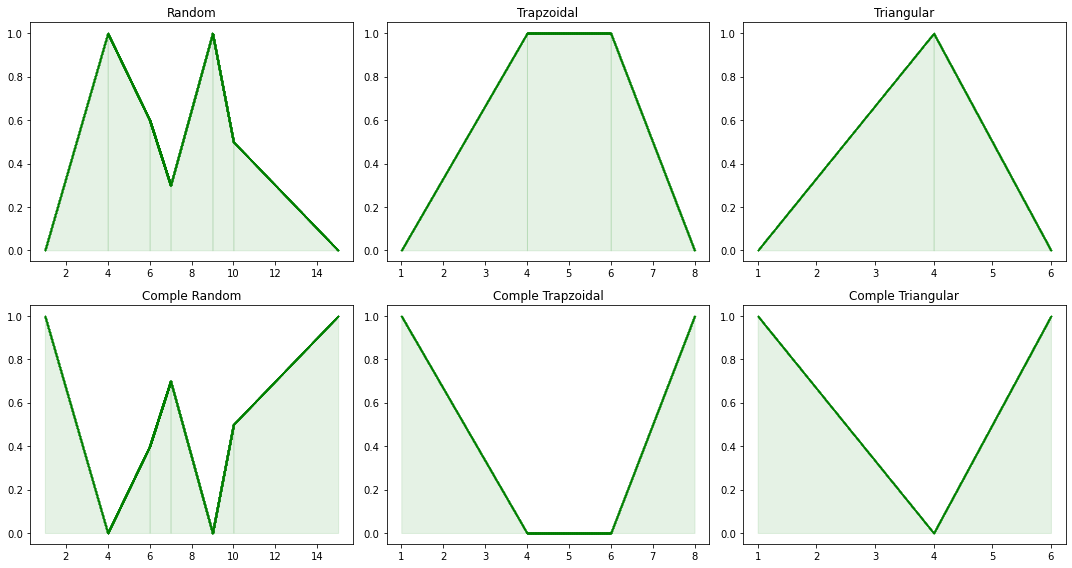

In [420]:
fig, axess = plt.subplots(2,3,figsize=(15,8))

display_membership(sef_random, "Random", axess[0,0])
display_membership(sef_random_compl, "Comple Random", axess[1,0])

display_membership(sef_trapzoidal, "Trapzoidal", axess[0, 1])
display_membership(sef_trapzoidal_compl, "Comple Trapzoidal", axess[1, 1])

display_membership(sef_triangular, "Triangular", axess[0, 2])
display_membership(sef_triangular_compl, "Comple Triangular", axess[1, 2])

plt.tight_layout()
plt.show()


## T-norme & T-conorme

In [483]:
class T_norme():
    
    def __init__(self,name):
        self.name = name
        
    def calculate(self,x,y):
        #assert x >= 0 and x <= 1 and y >= 0 and y <= 1 , "x and y must be in [0,1]"
        pass

class TN_Probabilist(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        return x*y
    
class TN_Lukasiewicz(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        return np.maximum(x+y-1 , 0)
    
    
class TN_Zadeh(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        return np.minimum(x,y)
    
    
class TN_Hamacher_product(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        if x == y == 0 : 
            return 0
        
        return (x*y) / (x+y-x*y) 
    
    
class TN_Drastic(T_norme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        if x == 1:
            return y
        
        if y == 1:
            return x
    
        return 0

In [484]:
class T_conorme():
    
    def __init__(self,name):
        self.name = name
        
    def calculate(self,x,y):
        #assert x >= 0 and x <= 1 and y >= 0 and y <= 1 , "x and y must be in [0,1]"
        pass
    
class TC_Probabilist(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        return x + y -x*y
    
    
class TC_Lukasiewicz(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        return np.minimum(x+y,1)
    
    
class TC_Zadeh(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)

        return np.maximum(x,y)
    
    
class TC_Hamacher_product(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        if x == y == 0 : 
            return 0
        
        return(x+y) / (1+x*y)
    
    
class TC_Drastic(T_conorme):
    
    def __init__(self,name):
        super().__init__(name)
        
    def calculate(self,x,y):
        super().calculate(x,y)
        
        if x == 0:
            return y
        
        if y == 0:
            return x
    
        return 1

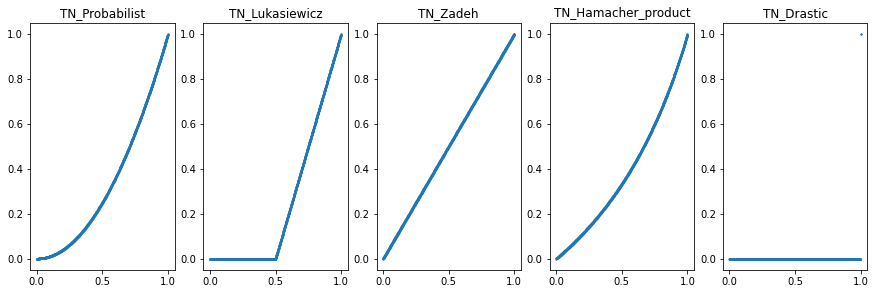

In [370]:
t_norme_P = TN_Probabilist("Probabilist")
t_norme_L = TN_Lukasiewicz("Lukasiewicz")
t_norme_Z = TN_Zadeh("Zadeh")
t_norme_H = TN_Hamacher_product("Hamacher_product")
t_norme_D = TN_Drastic("Drastic")

x = np.linspace(0,1,NB_POINTS) 
y = np.linspace(0,1,NB_POINTS)

plt.figure(figsize=(15,10))

plt.subplot(251)
plt.title("TN_Probabilist")
plt.scatter(x,get_values(x,y,t_norme_P),s=2.0)

plt.subplot(252)
plt.title("TN_Lukasiewicz")
plt.scatter(x,get_values(x,y,t_norme_L),s=2.0)

plt.subplot(253)
plt.title("TN_Zadeh")
plt.scatter(x,get_values(x,y,t_norme_Z),s=2.0)

plt.subplot(254)
plt.title("TN_Hamacher_product")
plt.scatter(x,get_values(x,y,t_norme_H),s=2.0)

plt.subplot(255)
plt.title("TN_Drastic")
plt.scatter(x,get_values(x,y,t_norme_D),s=2.0)

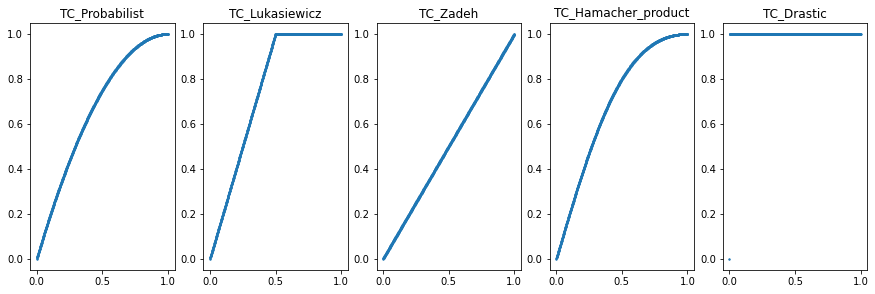

In [371]:
t_conorme_P = TC_Probabilist("Probabilist")
t_conorme_L = TC_Lukasiewicz("Lukasiewicz")
t_conorme_Z = TC_Zadeh("Zadeh")
t_conorme_H = TC_Hamacher_product("Hamacher_product")
t_conorme_D = TC_Drastic("Drastic")

plt.figure(figsize=(15,10))

plt.subplot(251)
plt.title("TC_Probabilist")
plt.scatter(x,get_values(x,y,t_conorme_P),s=2.0)

plt.subplot(252)
plt.title("TC_Lukasiewicz")
plt.scatter(x,get_values(x,y,t_conorme_L),s=2.0)

plt.subplot(253)
plt.title("TC_Zadeh")
plt.scatter(x,get_values(x,y,t_conorme_Z),s=2.0)

plt.subplot(254)
plt.title("TC_Hamacher_product")
plt.scatter(x,get_values(x,y,t_conorme_H),s=2.0)

plt.subplot(255)
plt.title("TC_Drastic")
plt.scatter(x,get_values(x,y,t_conorme_D),s=2.0)

## Operations

In [372]:
def operation(norme,set_A,set_B):
    
    inter = []

    born_inf , born_sup = np.minimum(np.min(set_A[:,0]),np.min(set_B[:,0])), np.maximum(np.max(set_A[:,0]),np.max(set_B[:,0]))
    space = np.linspace(born_inf , born_sup,NB_POINTS)
    
    for point in space:
        
        f_A = point_membership(set_A,point)
        f_B = point_membership(set_B,point)
        inter.append(norme.calculate(f_A,f_B))
        
    return np.array(inter) , space

def intersection(norme,set_A,set_B):
    # just to check that the intersection is done with t_norme 
    if isinstance(norme,T_norme):
        return operation(norme,set_A,set_B)
    else : raise Exception("intersection must be done with t_norme and not t_conorme")
    
def union(conorme,set_A,set_B):
    # just to check that the intersection is done with t_conorme 
    if isinstance(conorme,T_conorme):
        return operation(conorme,set_A,set_B)
    else : raise Exception("union must be done with t_conorme and not t_norme ")

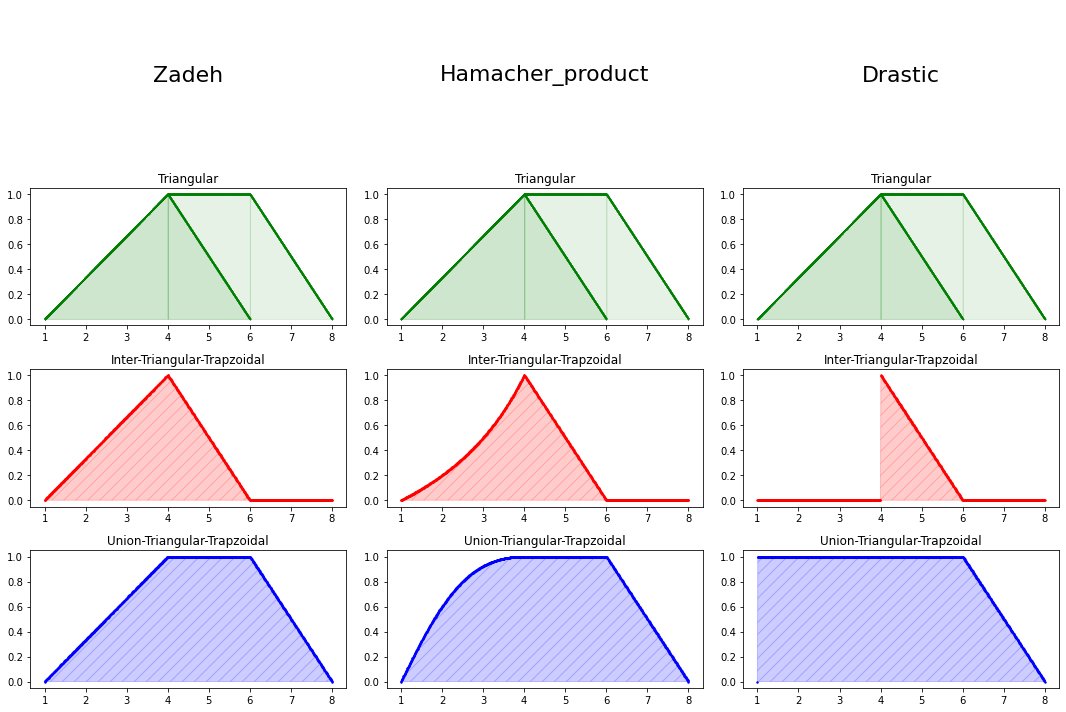

In [373]:


fig, axess = plt.subplots(4,3,figsize=(15,10))


axess[0,0].axis('off')
axess[0,0].text(0.5, 0.5,'Zadeh', ha='center', va='center', fontsize=22, color='black')

display_membership(sef_trapzoidal, "Trapzoidal", axess[1, 0])
display_membership(sef_triangular, "Triangular", axess[1, 0])

inter , space = intersection(t_norme_Z,sef_triangular,sef_trapzoidal)

axess[2,0].set_title("Inter-Triangular-Trapzoidal")
axess[2,0].scatter(space,inter,s=2.0,c='red')
axess[2,0].fill_between(space,inter, color='red', alpha=0.2,hatch='//')

unio , space = union(t_conorme_Z,sef_triangular,sef_trapzoidal)

axess[3,0].set_title("Union-Triangular-Trapzoidal")
axess[3,0].scatter(space,unio,s=2.0,c='blue')
axess[3,0].fill_between(space,unio, color='blue', alpha=0.2,hatch='//')



axess[0,1].axis('off')
axess[0,1].text(0.5, 0.5,'Hamacher_product', ha='center', va='center', fontsize=22, color='black')

display_membership(sef_trapzoidal, "Trapzoidal", axess[1, 1])
display_membership(sef_triangular, "Triangular", axess[1, 1])

inter , space = intersection(t_norme_H,sef_triangular,sef_trapzoidal)

axess[2,1].set_title("Inter-Triangular-Trapzoidal")
axess[2,1].scatter(space,inter,s=2.0,c='red')
axess[2,1].fill_between(space,inter, color='red', alpha=0.2,hatch='//')

unio , space = union(t_conorme_H,sef_triangular,sef_trapzoidal)

axess[3,1].set_title("Union-Triangular-Trapzoidal")
axess[3,1].scatter(space,unio,s=2.0,c='blue')
axess[3,1].fill_between(space,unio, color='blue', alpha=0.2,hatch='//')


axess[0,2].axis('off')
axess[0,2].text(0.5, 0.5,'Drastic', ha='center', va='center', fontsize=22, color='black')

display_membership(sef_trapzoidal, "Trapzoidal", axess[1, 2])
display_membership(sef_triangular, "Triangular", axess[1, 2])

inter , space = intersection(t_norme_D,sef_triangular,sef_trapzoidal)

axess[2,2].set_title("Inter-Triangular-Trapzoidal")
axess[2,2].scatter(space,inter,s=2.0,c='red')
axess[2,2].fill_between(space,inter, color='red', alpha=0.2,hatch='//')

unio , space = union(t_conorme_D,sef_triangular,sef_trapzoidal)

axess[3,2].set_title("Union-Triangular-Trapzoidal")
axess[3,2].scatter(space,unio,s=2.0,c='blue')
axess[3,2].fill_between(space,unio, color='blue', alpha=0.2,hatch='//')


plt.tight_layout()
plt.show()

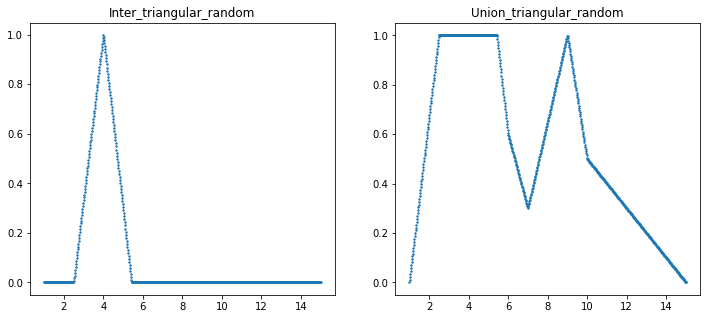

In [374]:
inter , space = intersection(t_norme_L,sef_triangular,sef_random)
unio , space = union(t_conorme_L,sef_triangular,sef_random)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Inter_triangular_random")
plt.scatter(space,inter,s=2.0)

plt.subplot(122)
plt.title("Union_triangular_random")
plt.scatter(space,unio,s=2.0)

## Propreties

### Triangular

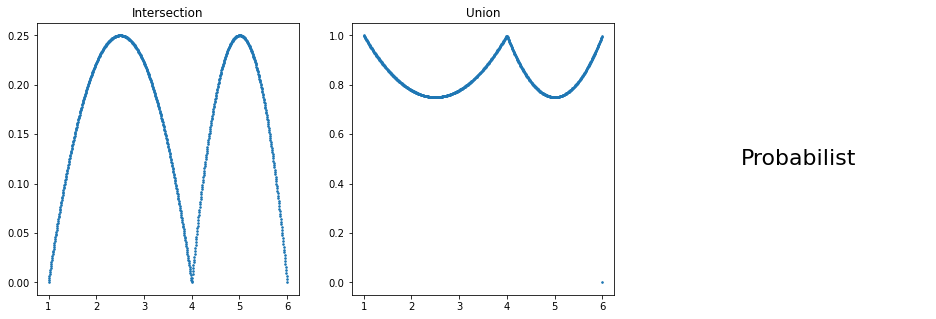

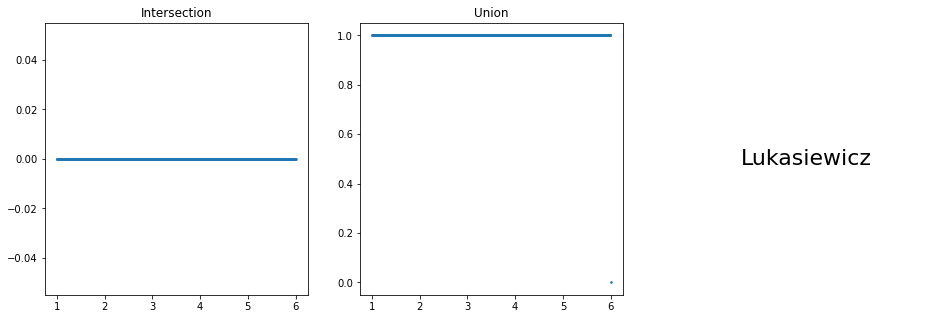

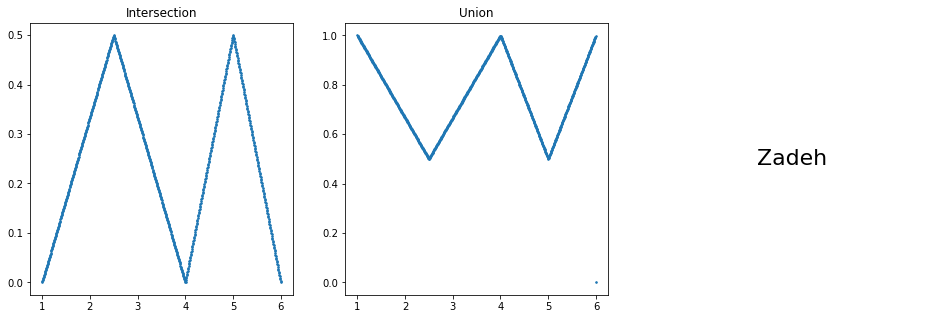

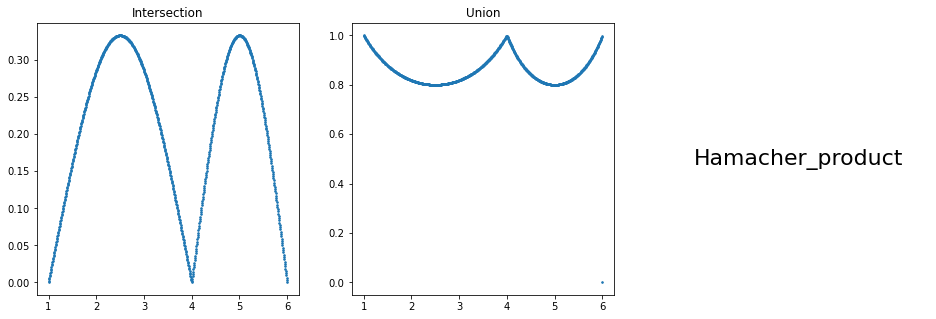

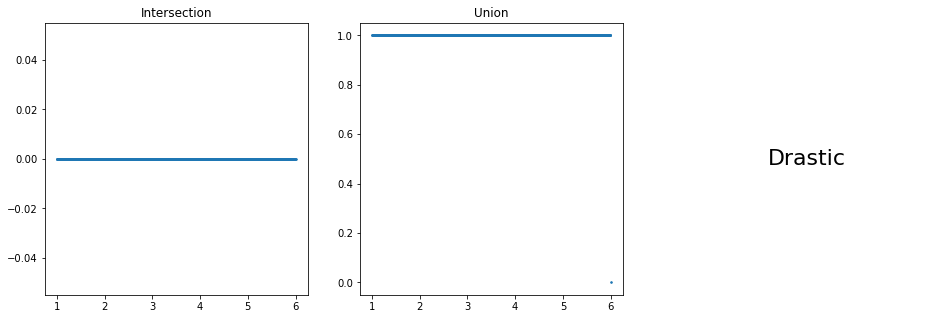

In [375]:
t_normes = [t_norme_P,t_norme_L,t_norme_Z,t_norme_H,t_norme_D]
t_conormes = [t_conorme_P,t_conorme_L,t_conorme_Z,t_conorme_H,t_conorme_D]
names = ["Probabilist","Lukasiewicz","Zadeh","Hamacher_product","Drastic"]

for i_norm in range(len(t_normes)):

    inter , space = intersection(t_normes[i_norm],sef_triangular,complementary(sef_triangular))
    unio , space = union(t_conormes[i_norm],sef_triangular,complementary(sef_triangular))

    plt.figure(figsize=(16,5))
    plt.subplot(131)
    plt.title("Intersection")
    plt.scatter(space,inter,s=2.5)

    plt.subplot(132)
    plt.title("Union")
    plt.scatter(space,unio,s=2.5)
    
    plt.subplot(133)
    plt.axis('off')
    plt.text(0.5, 0.5,names[i_norm], ha='center', va='center', fontsize=22, color='black')

### Trapzoidal

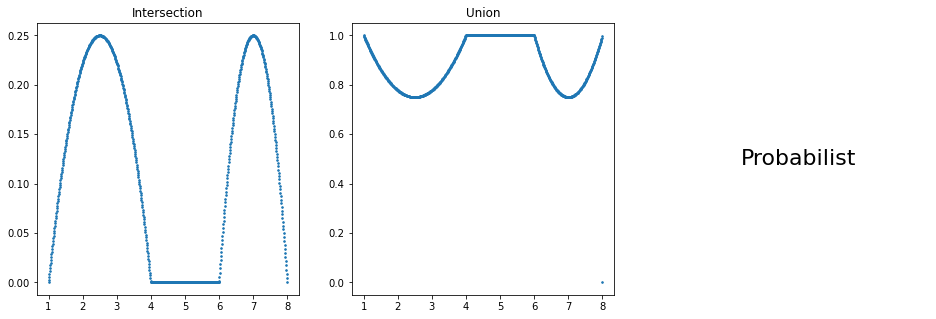

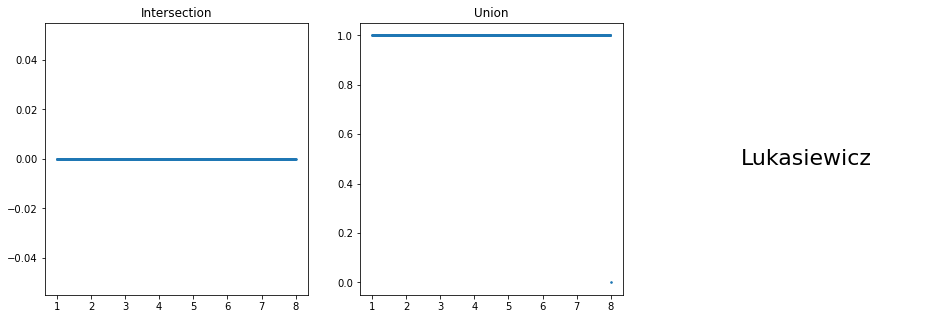

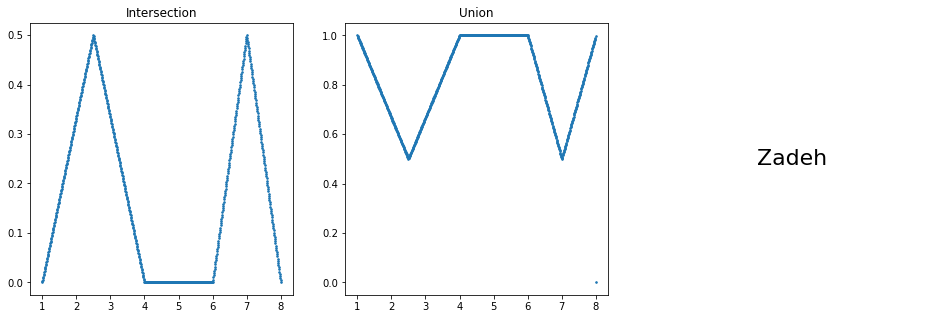

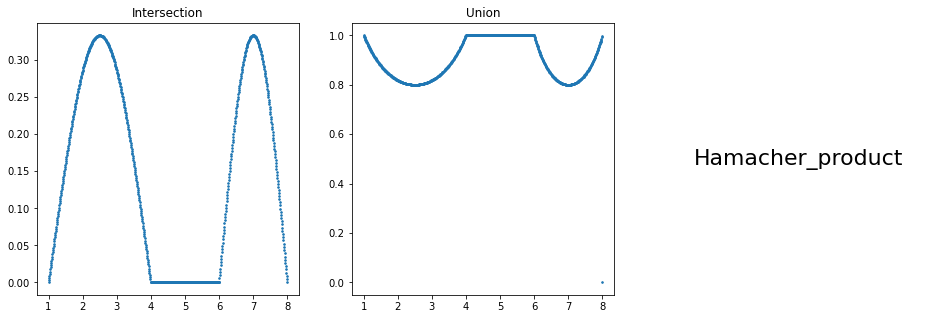

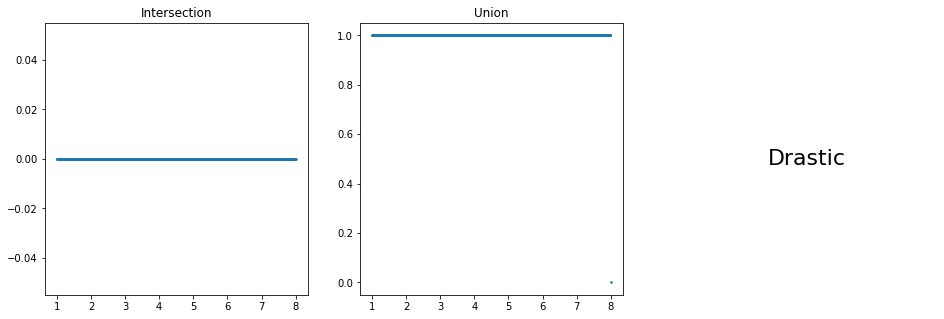

In [14]:
t_normes = [t_norme_P,t_norme_L,t_norme_Z,t_norme_H,t_norme_D]
t_conormes = [t_conorme_P,t_conorme_L,t_conorme_Z,t_conorme_H,t_conorme_D]
names = ["Probabilist","Lukasiewicz","Zadeh","Hamacher_product","Drastic"]

for i_norm in range(len(t_normes)):

    inter , space = intersection(t_normes[i_norm],sef_trapzoidal,complementary(sef_trapzoidal))
    unio , space = union(t_conormes[i_norm],sef_trapzoidal,complementary(sef_trapzoidal))

    plt.figure(figsize=(16,5))
    plt.subplot(131)
    plt.title("Intersection")
    plt.scatter(space,inter,s=2.5)

    plt.subplot(132)
    plt.title("Union")
    plt.scatter(space,unio,s=2.5)
    
    plt.subplot(133)
    plt.axis('off')
    plt.text(0.5, 0.5,names[i_norm], ha='center', va='center', fontsize=22, color='black')

### Random

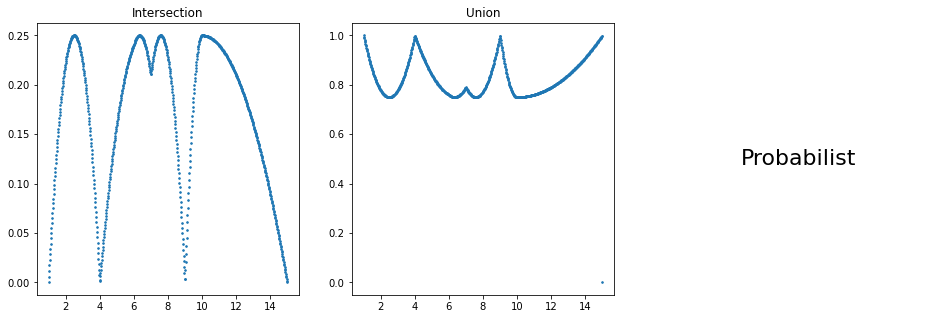

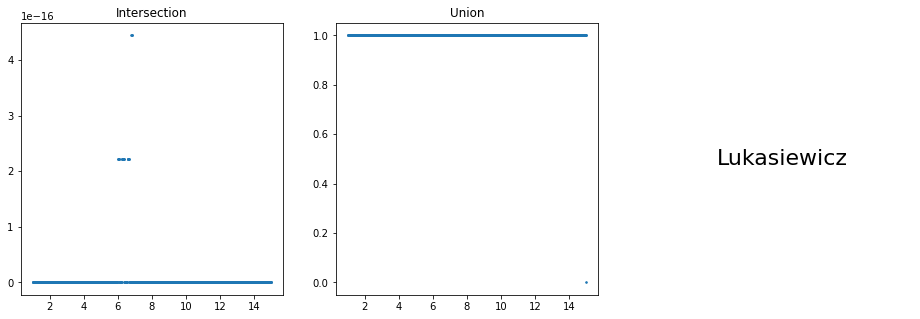

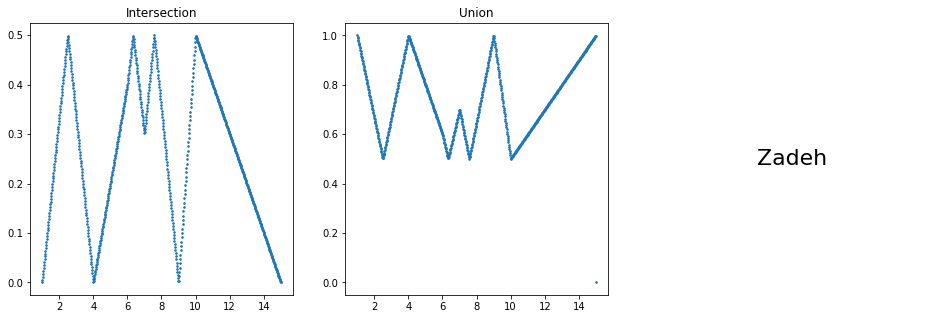

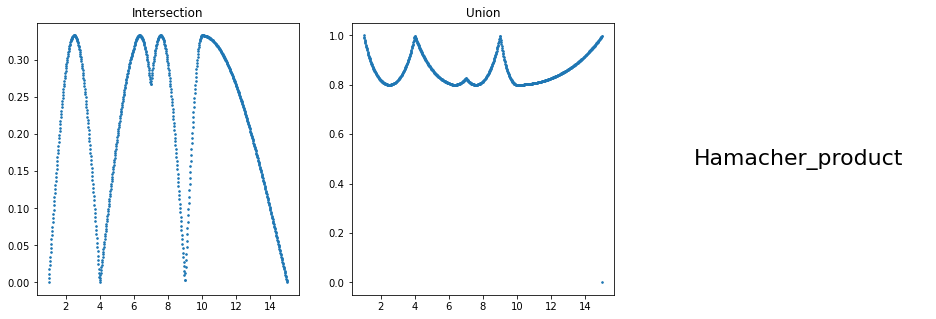

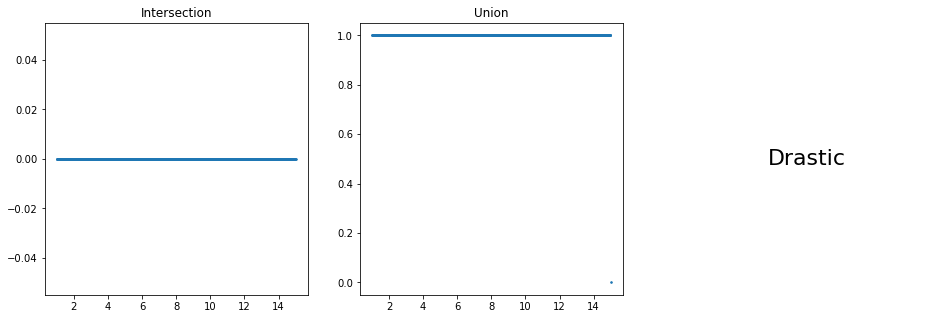

In [15]:
t_normes = [t_norme_P,t_norme_L,t_norme_Z,t_norme_H,t_norme_D]
t_conormes = [t_conorme_P,t_conorme_L,t_conorme_Z,t_conorme_H,t_conorme_D]
names = ["Probabilist","Lukasiewicz","Zadeh","Hamacher_product","Drastic"]

for i_norm in range(len(t_normes)):

    inter , space = intersection(t_normes[i_norm],sef_random,complementary(sef_random))
    unio , space = union(t_conormes[i_norm],sef_random,complementary(sef_random))

    plt.figure(figsize=(16,5))
    plt.subplot(131)
    plt.title("Intersection")
    plt.scatter(space,inter,s=2.5)

    plt.subplot(132)
    plt.title("Union")
    plt.scatter(space,unio,s=2.5)
    
    plt.subplot(133)
    plt.axis('off')
    plt.text(0.5, 0.5,names[i_norm], ha='center', va='center', fontsize=22, color='black')

## Extension

In [465]:
class Phi:
    def __init__(self, expression, variable):
        self.expression = expression
        self.variable = variable

    def calcule(self, valeur):
        return self.expression.subs(self.variable, valeur)

    def antecedent(self, valeur):
        solutions = sp.solve(
            sp.Eq(self.expression, valeur),
            self.variable,
        )
        return solutions

def extension(A, phi, num=20):
    f_b = []

    f_a = lambda x: np.interp(x, A[:, 0], A[:, 1])

    y = [float(phi.calcule(A[i, 0])) for i in range(len(A))]

    y_min = min(y) - 1
    y_max = max(y) + 1

    y = np.linspace(y_min, y_max, num)

    for y_i in y:
        x_i = phi.antecedent(y_i)
        if len(x_i) == 0:
            f_b.append((y_i, 0))
        else:
            sup = f_a(x_i).max()
            f_b.append((y_i, sup))

    return np.array(f_b)

In [466]:
x = sp.symbols("x", real=True, strict=False)
phi = Phi(3.5* x, x)

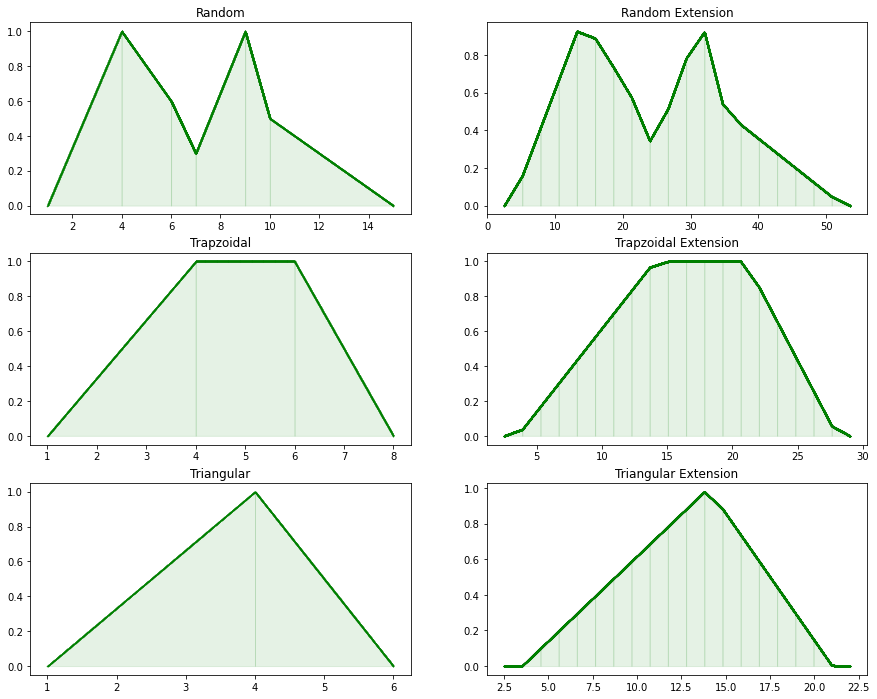

In [467]:
fig, axess = plt.subplots(3,2,figsize=(15,12))

f_B = extension(sef_random, phi)
display_membership(sef_random,"Random",axess[0,0])
display_membership(f_B,"Random Extension",axess[0,1])

f_B = extension(sef_trapzoidal, phi)
display_membership(sef_trapzoidal,"Trapzoidal",axess[1,0])
display_membership(f_B,"Trapzoidal Extension",axess[1,1])

f_B = extension(sef_triangular, phi)
display_membership(sef_triangular,"Triangular",axess[2,0])
display_membership(f_B,"Triangular Extension",axess[2,1])

## MPG

In [487]:
def fuzzy_implication(A, B, x0, implication_function):

    membership_function_A = lambda x: np.interp(x, A[:, 0], A[:, 1])
    membership_function_B = lambda x: np.interp(x, B[:, 0], B[:, 1])

    implication_result = []
    
    y_min = np.min(B[:, 0]) - 1
    y_max = np.max(B[:, 0]) + 1
    y_values = np.linspace(y_min, y_max, 100)
    
    for y_i in y_values:
        implication_result.append((y_i, implication_function(membership_function_A(x0), membership_function_B(y_i))))

    return np.array(implication_result)


In [488]:
sef_A = np.array([(1, 0), (2, 1), (4, 0)])
sef_B = np.array([(3, 0), (5, 1), (6, 0)])

implication_functions = { "Lukasiewicz" : lambda a, b: np.minimum(1-a+b, 1) , 
                         "Kleene-Dienes" : lambda a,b : np.maximum(1-a,b),
                         "Reichenbach" : lambda a,b : 1-a+a*b,
                         "Willmott" : lambda a,b : np.maximum(1-a,np.minimum(a,b)),
                         "Brouwer-Godel" : lambda a,b : 1 if a <= b else b,
                         "Goguen" : lambda a,b : 1 if a == 0 else np.minimum(b/a,1),
                         "Rescher-Gaines" : lambda a,b : 1 if a <= b else 0 , 
                         "Mamdani" : lambda a,b : np.minimum(a,b),
                         "Larsen" : lambda a,b : a*b
                        }

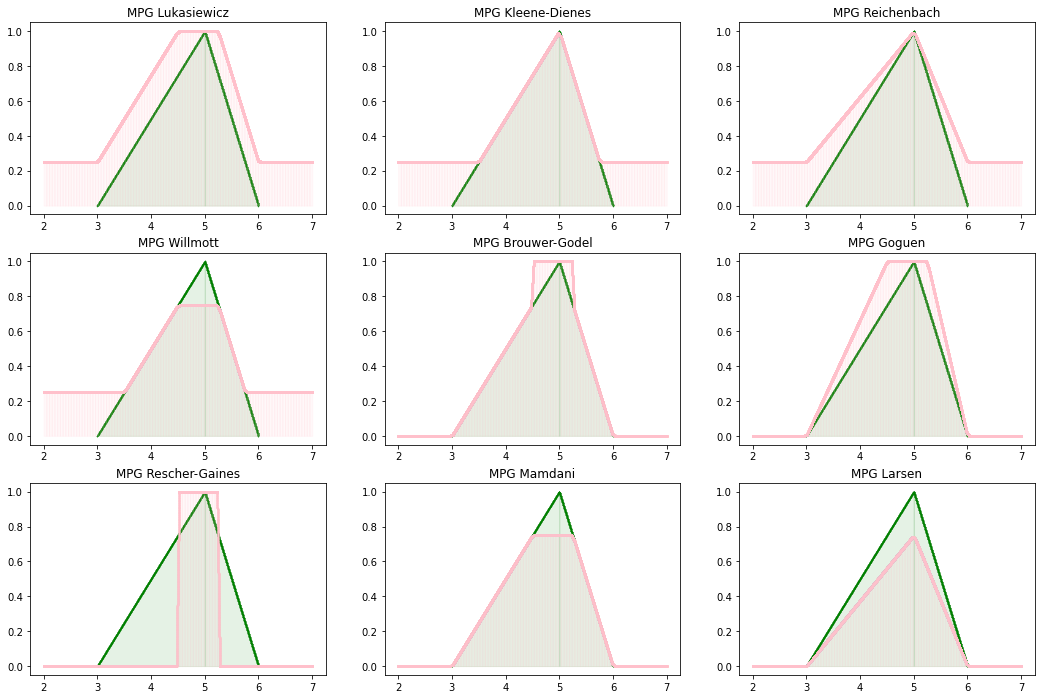

In [489]:
x0 = 2.5

fig, axess = plt.subplots(3,3,figsize=(18,12))
indices = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
i = 0
for name,func in implication_functions.items():
        
    resultat_B0 = fuzzy_implication(sef_A,sef_B, x0, func)

    display_membership(B,name,axess[indices[i]])
    display_membership(resultat_B0,"MPG "+str(name),axess[indices[i]],'pink')
    
    i += 1
    

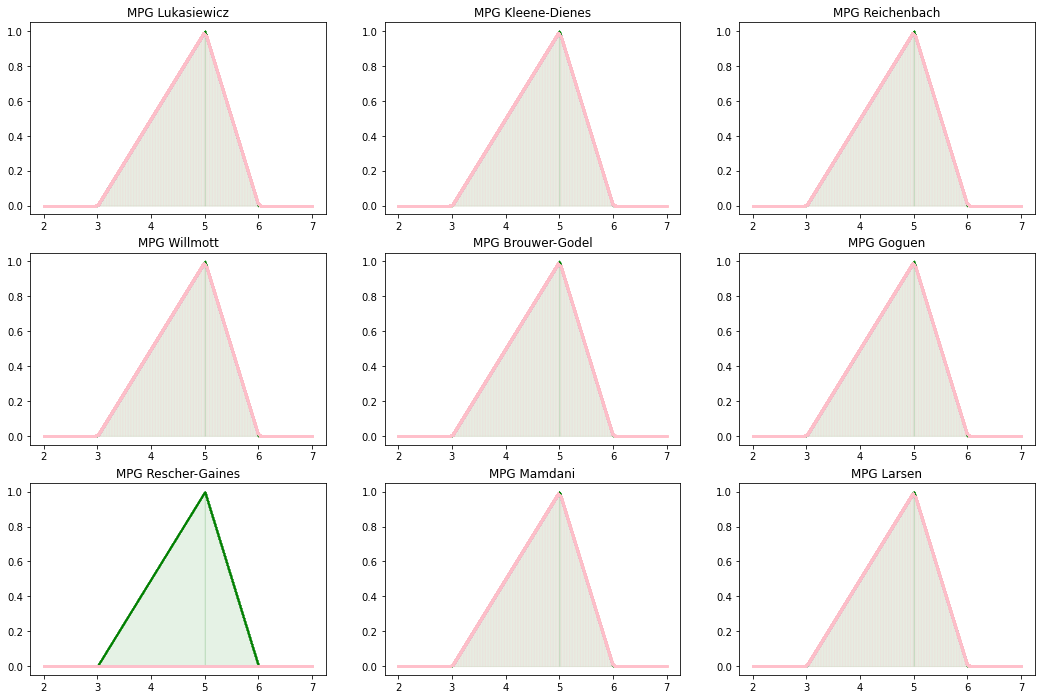

In [490]:
x0 = 2

fig, axess = plt.subplots(3,3,figsize=(18,12))
indices = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
i = 0
for name,func in implication_functions.items():
        
    resultat_B0 = fuzzy_implication(sef_A,sef_B, x0, func)

    display_membership(B,name,axess[indices[i]])
    display_membership(resultat_B0,"MPG "+str(name),axess[indices[i]],'pink')
    
    i += 1
    

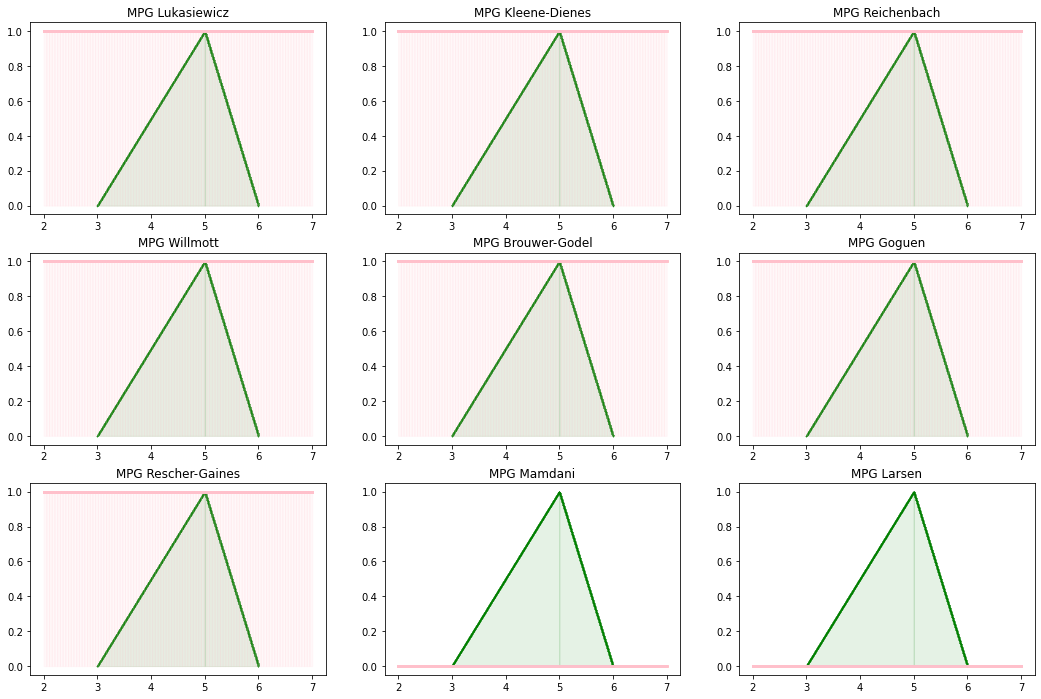

In [491]:
x0 = 1

fig, axess = plt.subplots(3,3,figsize=(18,12))
indices = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
i = 0
for name,func in implication_functions.items():
        
    resultat_B0 = fuzzy_implication(sef_A,sef_B, x0, func)

    display_membership(B,name,axess[indices[i]])
    display_membership(resultat_B0,"MPG "+str(name),axess[indices[i]],'pink')
    
    i += 1
    

In [492]:
def Modus_Ponens_Generalise(A, B, A_prime, implication_function, t_norm):

    membership_function_A = lambda x: np.interp(x, A[:, 0], A[:, 1])
    membership_function_A_prime = lambda x: np.interp(x, A_prime[:, 0], A_prime[:, 1])
    membership_function_B = lambda x: np.interp(x, B[:, 0], B[:, 1])

    B_prime = []

    values = list(A[:, 0]) + list(B[:, 0])
    value_min = np.min(values)
    value_max = np.max(values)
    y_values = np.linspace(value_min, value_max, 100)

    x_values = np.linspace(value_min, value_max, 100)

    f_a_x = membership_function_A(x_values)
    f_a_prime_x = membership_function_A_prime(x_values)

    for y_i in y_values:
        implication_result = implication_function(f_a_x, membership_function_B(y_i))
        B_prime.append((y_i, t_norm.calculate(f_a_prime_x, np.array(implication_result)).max()))

    return np.array(B_prime)


In [501]:
A = np.array([(1, 0), (2, 1), (4, 0)])
B = np.array([(3, 0), (5, 1), (6, 0)])
A_prime = np.array([(2, 0), (2.5, 1), (3, 0)])

### T-norme Lukasiewicz

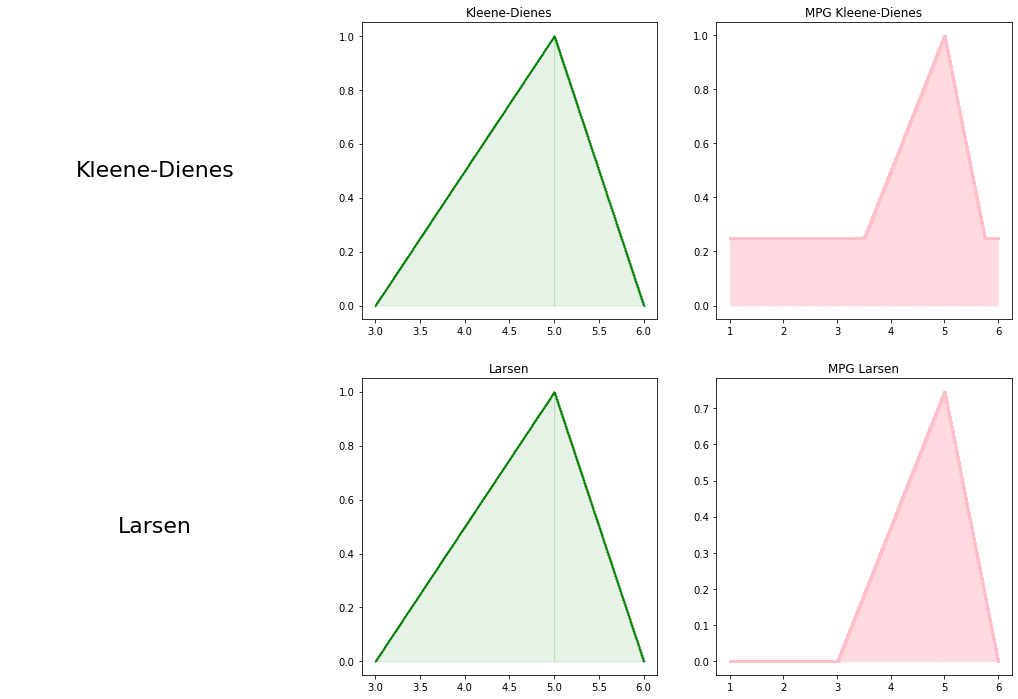

In [500]:
fig, axess = plt.subplots(2,3,figsize=(18,12))

tnorme = TN_Lukasiewicz("TN_Lukasiewicz")

implication_function = implication_functions["Kleene-Dienes"]
result = Modus_Ponens_Generalise(A, B, A_prime, implication_function, tnorme)

axess[0,0].axis('off')
axess[0,0].text(0.5, 0.5,'Kleene-Dienes', ha='center', va='center', fontsize=22, color='black')

display_membership(B,"Kleene-Dienes",axess[0,1])
display_membership(result,"MPG Kleene-Dienes",axess[0,2],'pink')


implication_function = implication_functions["Larsen"]
result = Modus_Ponens_Generalise(A, B, A_prime, implication_function, tnorme)

axess[1,0].axis('off')
axess[1,0].text(0.5, 0.5,'Larsen', ha='center', va='center', fontsize=22, color='black')

display_membership(B,"Larsen",axess[1,1])
display_membership(result,"MPG Larsen",axess[1,2],'pink')

### T-norme Zadeh

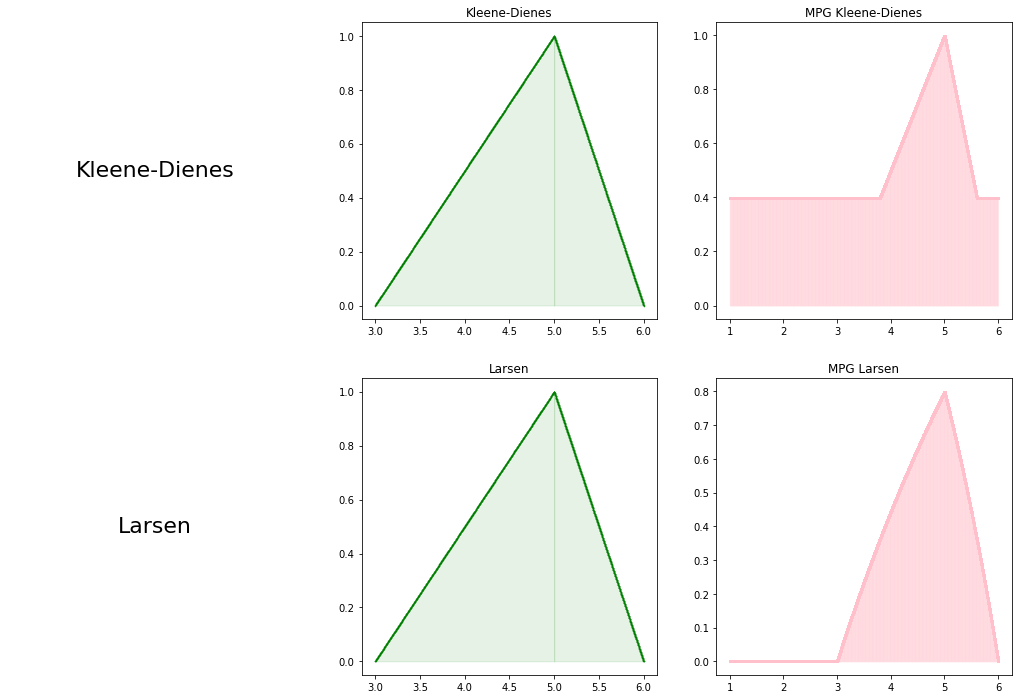

In [507]:
fig, axess = plt.subplots(2,3,figsize=(18,12))

tnorme = TN_Zadeh("TN_Zadeh")

implication_function = implication_functions["Kleene-Dienes"]
result = Modus_Ponens_Generalise(A, B, A_prime, implication_function, tnorme)

axess[0,0].axis('off')
axess[0,0].text(0.5, 0.5,'Kleene-Dienes', ha='center', va='center', fontsize=22, color='black')

display_membership(B,"Kleene-Dienes",axess[0,1])
display_membership(result,"MPG Kleene-Dienes",axess[0,2],'pink')


implication_function = implication_functions["Larsen"]
result = Modus_Ponens_Generalise(A, B, A_prime, implication_function, tnorme)

axess[1,0].axis('off')
axess[1,0].text(0.5, 0.5,'Larsen', ha='center', va='center', fontsize=22, color='black')

display_membership(B,"Larsen",axess[1,1])
display_membership(result,"MPG Larsen",axess[1,2],'pink')